In [53]:
import pandas as pd

# Load your CSV data into a DataFrame (replace with the actual path to your file)
df = pd.read_csv('cardiovascular_train.csv')

# Create an empty dictionary to store the percentage tables
percentage_tables = {}

# For each column, calculate the percentage of each unique value
for column in df.columns:
    percentage_tables[column] = df[column].value_counts(normalize=True) * 100

# Create a Styler for each table with color formatting
styled_tables = {}

# For each column, style the percentage table with a color gradient
for column, table in percentage_tables.items():
    # Convert the series to a DataFrame and apply background gradient
    styled_tables[column] = table.to_frame().style.background_gradient(cmap='Blues')

# Display the tables with color (This works in Jupyter Notebooks or environments that support display())
for column, styled_table in styled_tables.items():
    print(f"Styled table for {column}:")
    display(styled_table)  # This will render the table with colors in a Jupyter environment

Styled table for Age:


Styled table for Anxiety:


Styled table for BodyMassIndex:


Styled table for Depression:


Styled table for Diabetes:


Styled table for EducationLevel:


Styled table for Hypercholesterolemia:


Styled table for Hypertension:


Styled table for PhysicalActivity:


Styled table for Sex:


Styled table for SleepDuration:


Styled table for SmokerProfile:


Styled table for SocioeconomicStatus:


Hypertension     No  Yes
SmokerProfile           
Ex_Smoker       530  102
Non_Smoker     1770  405
Smoker          807  231


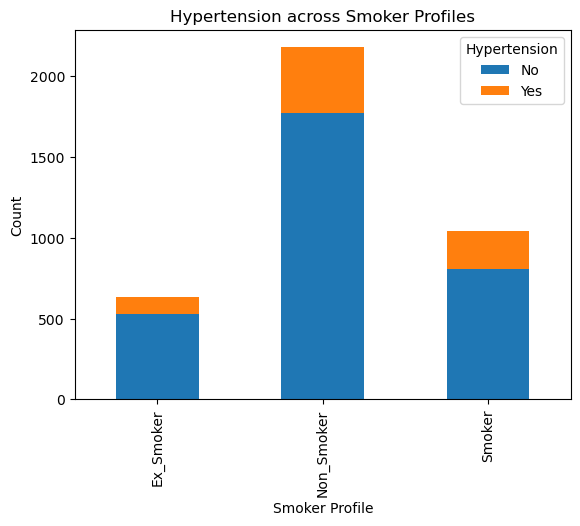

In [3]:
# Example of cross-tabulation
import matplotlib.pyplot as plt
cross_tab = pd.crosstab(train_data['SmokerProfile'], train_data['Hypertension'])
print(cross_tab)

# Visualize as a stacked bar chart
cross_tab.plot(kind='bar', stacked=True)
plt.title('Hypertension across Smoker Profiles')
plt.xlabel('Smoker Profile')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.show()

In [4]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork

# Load the training dataset
train_data = pd.read_csv("cardiovascular_train.csv")

# Initialize HillClimbSearch estimator
hc = HillClimbSearch(train_data)

# Set the scoring method to BIC score
scoring_method = BicScore(train_data)

# Learn the structure of the Bayesian network using HillClimbSearch and the BIC score
model = hc.estimate(scoring_method=scoring_method)

# Print the learned structure (edges)
print("Learned Structure:", model.edges())



  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned Structure: [('Age', 'PhysicalActivity'), ('Anxiety', 'Sex'), ('BodyMassIndex', 'Age'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'SocioeconomicStatus'), ('Diabetes', 'PhysicalActivity'), ('Hypertension', 'Hypercholesterolemia'), ('PhysicalActivity', 'Hypertension'), ('Sex', 'PhysicalActivity'), ('SmokerProfile', 'Age'), ('SmokerProfile', 'Hypercholesterolemia')]


In [5]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork

# Example: Creating a Bayesian Network model (structure learning done already)
model = BayesianNetwork([
    ('Age', 'PhysicalActivity'),
    ('Anxiety', 'Sex'),
    ('BodyMassIndex', 'Age'),
    ('BodyMassIndex', 'Hypertension'),
    ('BodyMassIndex', 'SmokerProfile'),
    ('BodyMassIndex', 'SocioeconomicStatus'),
    ('Diabetes', 'PhysicalActivity'),
    ('Hypertension', 'Hypercholesterolemia'),
    ('PhysicalActivity', 'Hypertension'),
    ('Sex', 'PhysicalActivity'),
    ('SmokerProfile', 'Age'),
    ('SmokerProfile', 'Hypercholesterolemia')
])

# Use Maximum Likelihood Estimation (MLE) to estimate CPDs
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

# Print full CPD data for each variable in the network
for cpd in model.get_cpds():
    #print(f"CPD for {cpd.variable}:")
    print(cpd)
    #print("State Names:", cpd.state_names)
    #print("Values (probabilities):")
    #print(cpd.values)  # This will show the full CPD matrix
    #print("="*50)

# Check if the model is valid
assert model.check_model()




+---------------+-----+----------------------------+
| BodyMassIndex | ... | BodyMassIndex(Underweight) |
+---------------+-----+----------------------------+
| SmokerProfile | ... | SmokerProfile(Smoker)      |
+---------------+-----+----------------------------+
| Age(18-24)    | ... | 0.0                        |
+---------------+-----+----------------------------+
| Age(24-34)    | ... | 0.04477611940298507        |
+---------------+-----+----------------------------+
| Age(34-44)    | ... | 0.9104477611940298         |
+---------------+-----+----------------------------+
| Age(44-54)    | ... | 0.04477611940298507        |
+---------------+-----+----------------------------+
| Age(54-64)    | ... | 0.0                        |
+---------------+-----+----------------------------+
| Age(64-74)    | ... | 0.0                        |
+---------------+-----+----------------------------+
+-----+---------------+---------------+
| ... | Age(64-74)    | Age(64-74)    |
+-----+------------

In [6]:
# To get the parents of a given node (variable)
parents_of_diabetes = model.get_parents('Age')
print(parents_of_diabetes)


['BodyMassIndex', 'SmokerProfile']


In [25]:
from pgmpy.inference import VariableElimination

# Perform inference on the learned model
inference = VariableElimination(model)

# Query the probability distribution for Hypertension given that the person is a smoker and underweight
query = inference.query(variables=['Hypertension'], evidence={'SmokerProfile': 'Smoker', 'BodyMassIndex': 'Underweight'})

# Print the result of the query
print(query)


+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.7023 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.2977 |
+-------------------+---------------------+


In [18]:
# Define the model
model = BayesianNetwork()

# Add nodes to the model (variables in the dataset)
model.add_nodes_from(['Age', 'PhysicalActivity', 'Hypertension', 'SmokerProfile', 'Diabetes'])

# Add edges (dependencies between variables)
model.add_edges_from([
    ('Age', 'PhysicalActivity'),  # Age affects PhysicalActivity
    ('SmokerProfile', 'Hypertension'),  # SmokerProfile affects Hypertension
    ('PhysicalActivity', 'Hypertension'),  # PhysicalActivity affects Hypertension
    ('SmokerProfile', 'Diabetes'),  # SmokerProfile affects Diabetes
])

# Check the model
print("Nodes in the model:", model.nodes())
print("Edges in the model:", model.edges())


Nodes in the model: ['Age', 'PhysicalActivity', 'Hypertension', 'SmokerProfile', 'Diabetes']
Edges in the model: [('Age', 'PhysicalActivity'), ('PhysicalActivity', 'Hypertension'), ('SmokerProfile', 'Hypertension'), ('SmokerProfile', 'Diabetes')]


In [22]:
# Query for PhysicalActivity given certain Age ranges
query = inference.query(variables=['PhysicalActivity'], evidence={'Age': '(34,44]'})

# Print the result
print(query)


+----------------------------+-------------------------+
| PhysicalActivity           |   phi(PhysicalActivity) |
+============================+=========================+
| PhysicalActivity(Inactive) |                  0.2000 |
+----------------------------+-------------------------+
| PhysicalActivity(Active)   |                  0.8000 |
+----------------------------+-------------------------+


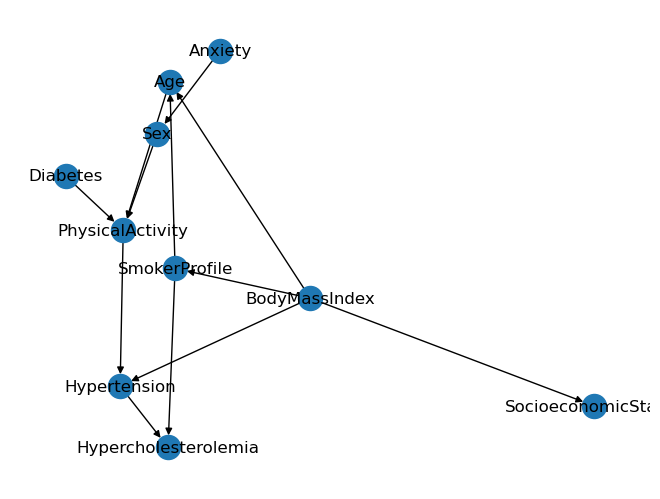

In [35]:
import networkx as nx
import matplotlib.pyplot as plt



nx.draw(nx.DiGraph(model.edges()), with_labels=True)
plt.draw()


In [7]:
# To check conditional independencies in the model
independencies = model.get_independencies()
#print(independencies)


In [ ]:
VERS√ÉO 2 DO PROJETO 1

In [1]:
import pandas as pd

# Load datasets
train_data2 = pd.read_csv('cardiovascular_train.csv')
test_data2 = pd.read_csv('cardiovascular_test.csv')

# Check the first few rows
print(train_data2.head())

# Check data types and missing values
print(train_data2.info())


     Age Anxiety BodyMassIndex Depression Diabetes  EducationLevel  \
0  54-64      No    Overweight         No       No               2   
1  24-34      No         Obese         No       No               3   
2  24-34      No    Overweight         No       No               2   
3  34-44      No    Overweight         No       No               2   
4  44-54      No    Overweight         No      Yes               2   

  Hypercholesterolemia Hypertension       PhysicalActivity     Sex  \
0                   No           No       Regularly Active    Male   
1                  Yes           No       Regularly Active  Female   
2                   No           No  Insufficiently Active    Male   
3                  Yes          Yes       Regularly Active    Male   
4                   No          Yes       Regularly Active  Female   

  SleepDuration SmokerProfile  SocioeconomicStatus  
0      6-9hours        Smoker                    3  
1      6-9hours    Non_Smoker                    3  

In [2]:
from pgmpy.estimators import HillClimbSearch, K2Score 

# Load the data
data = pd.read_csv('cardiovascular_train.csv')

# Initialize the Hill Climbing search with K2 Score
hc = HillClimbSearch(data)
k2_scoring = K2Score(data)

# Estimate the best model based on the K2 score
best_model = hc.estimate(scoring_method=k2_scoring)

# Print the edges of the learned structure
print("Learned structure using Hill Climbing + K2 Score:")
print(best_model.edges()) 

  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned structure using Hill Climbing + K2 Score:
[('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'PhysicalActivity'), ('Age', 'SocioeconomicStatus'), ('Age', 'Hypercholesterolemia'), ('Anxiety', 'BodyMassIndex'), ('Anxiety', 'Sex'), ('Anxiety', 'SmokerProfile'), ('Anxiety', 'SocioeconomicStatus'), ('Depression', 'BodyMassIndex'), ('Depression', 'SmokerProfile'), ('Depression', 'SocioeconomicStatus'), ('Diabetes', 'BodyMassIndex'), ('Diabetes', 'PhysicalActivity'), ('Diabetes', 'SmokerProfile'), ('Diabetes', 'SocioeconomicStatus'), ('Diabetes', 'Hypercholesterolemia'), ('Diabetes', 'Hypertension'), ('EducationLevel', 'BodyMassIndex'), ('EducationLevel', 'SmokerProfile'), ('EducationLevel', 'SocioeconomicStatus'), ('Hypercholesterolemia', 'BodyMassIndex'), ('Hypercholesterolemia', 'SmokerProfile'), ('Hypercholesterolemia', 'SocioeconomicStatus'), ('Hypercholesterolemia', 'Hypertension'), ('Hypertension', 'BodyMassIndex'), ('Hypertension', 'SmokerProfile'), ('Hypertension', 

In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

# Create a BayesianNetwork model using the learned structure (best_dag)
BNmodel = BayesianNetwork(best_model.edges())

# Fit the model using MaximumLikelihoodEstimator to estimate CPDs
BNmodel.fit(data, estimator=MaximumLikelihoodEstimator)

In [4]:
# Print each estimated CPD to review the probabilities
print("Estimated CPDs:")
for cpd in BNmodel.get_cpds():
    print(f"CPD of {cpd.variable}:")
    print(cpd)

Estimated CPDs:
CPD of Age:
+---------------+-----+------------------------+
| SleepDuration | ... | SleepDuration(>9hours) |
+---------------+-----+------------------------+
| Age(18-24)    | ... | 0.0                    |
+---------------+-----+------------------------+
| Age(24-34)    | ... | 0.25                   |
+---------------+-----+------------------------+
| Age(34-44)    | ... | 0.25                   |
+---------------+-----+------------------------+
| Age(44-54)    | ... | 0.5                    |
+---------------+-----+------------------------+
| Age(54-64)    | ... | 0.0                    |
+---------------+-----+------------------------+
| Age(64-74)    | ... | 0.0                    |
+---------------+-----+------------------------+
CPD of BodyMassIndex:
+----------------------------+-----+
| Age                        | ... |
+----------------------------+-----+
| Anxiety                    | ... |
+----------------------------+-----+
| Depression                 |

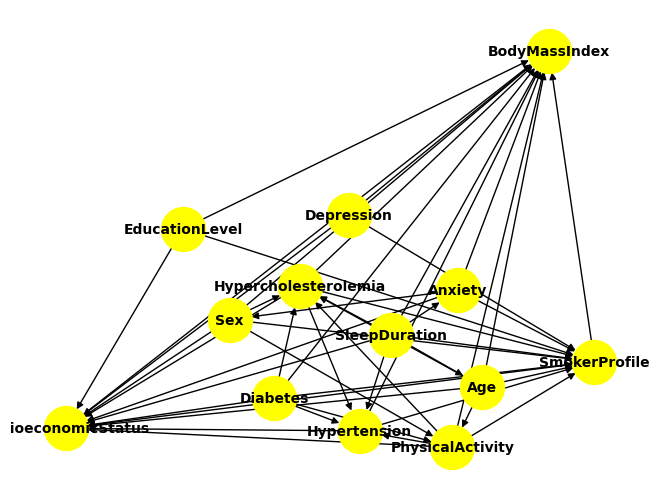

In [35]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to plot a Bayesian Network (DAG)
def plot_network(model):
    G = nx.DiGraph(model.edges())
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='yellow', font_size=10, font_weight='bold')
    plt.show()

# Visualize the learned DAGs

plot_network(best_model)

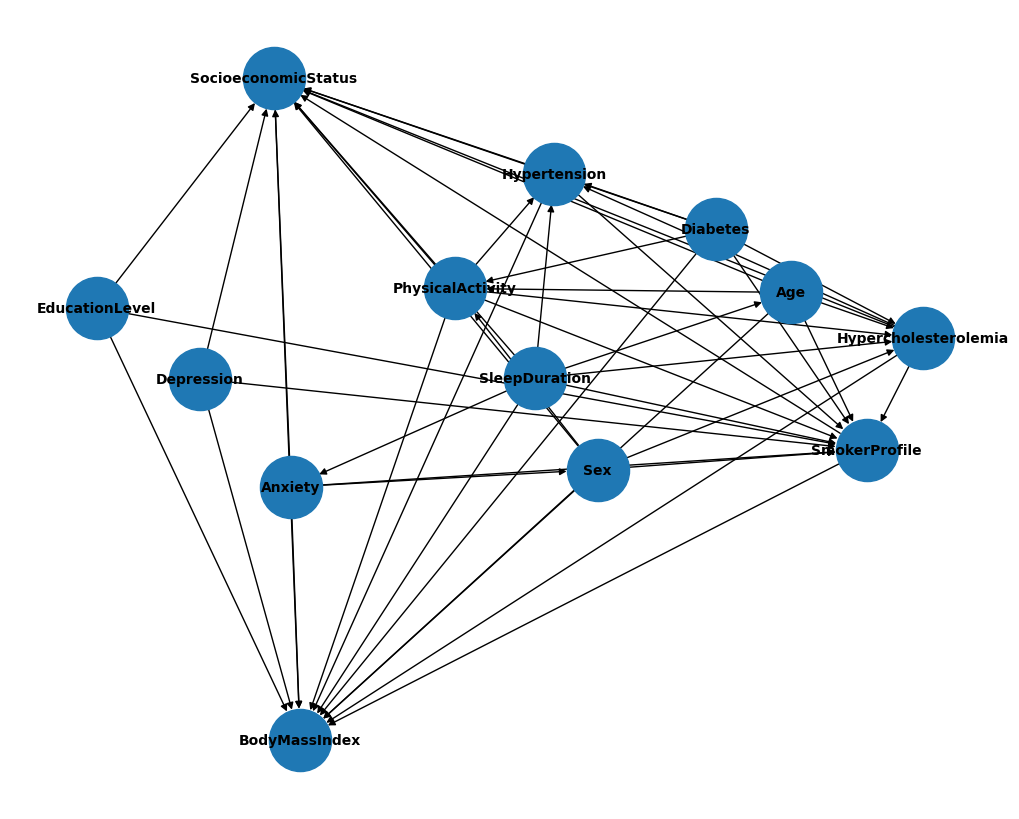

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert Bayesian network to NetworkX DiGraph (if necessary)
nx_model = nx.DiGraph(BNmodel.edges())

# Draw the network
plt.figure(figsize=(10, 8))
nx.draw(nx_model, with_labels=True, node_size=2000, font_size=10, font_color="black", font_weight="bold")
plt.show()


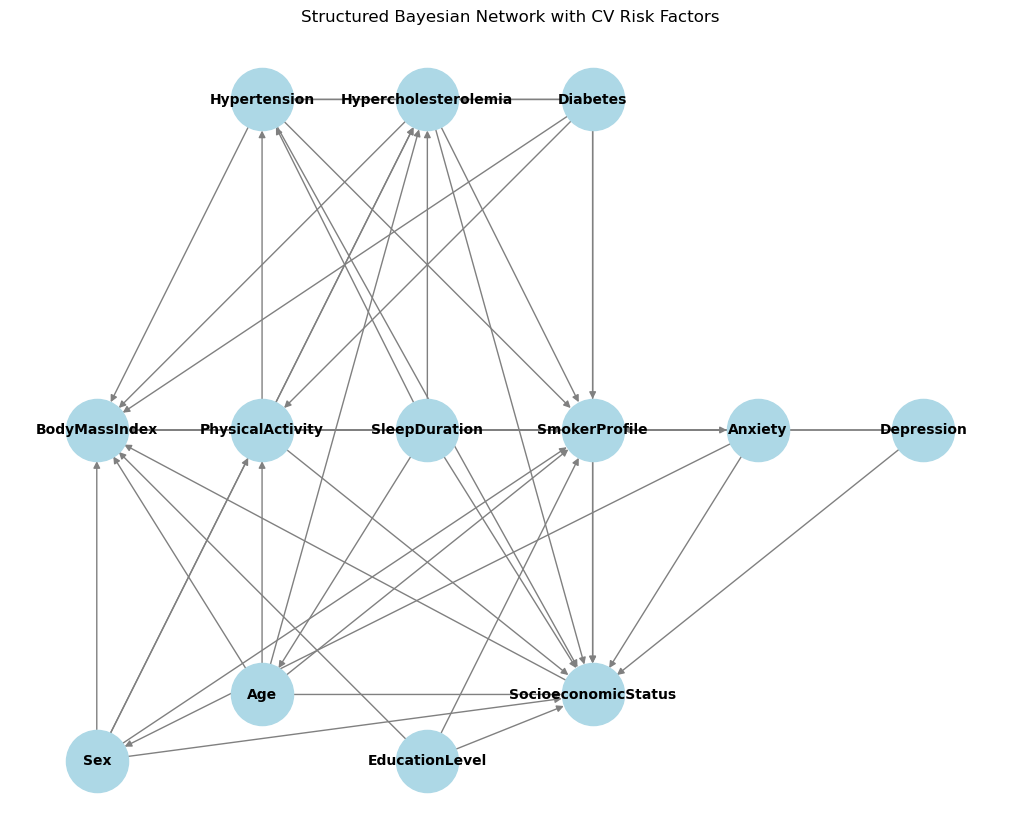

In [22]:
import networkx as nx
import matplotlib.pyplot as plt



nx_model = nx.DiGraph(BNmodel.edges())

#Define the layout positions manually based on categories
initial_pos = {
    # Non-modifiable CV risk factors (bottom level)
    'Sex': (0, 0), 'Age': (1, 0.2), 'EducationLevel': (2, 0), 'SocioeconomicStatus': (3, 0.2),

#Modifiable CV risk factors (middle level)
    'BodyMassIndex': (0, 1), 'PhysicalActivity': (1, 1), 'SleepDuration': (2, 1),
    'SmokerProfile': (3, 1), 'Anxiety': (4, 1), 'Depression': (5, 1),

#Medical conditions (top level)
    'Hypertension': (1, 2), 'Hypercholesterolemia': (2, 2), 'Diabetes': (3, 2)
}

#Use initial positions and apply a spring layout with a fixed initial structure
pos = nx.spring_layout(nx_model, pos=initial_pos, fixed=initial_pos.keys(), seed=42)

#Draw the network
plt.figure(figsize=(10, 8))
nx.draw(nx_model, pos=pos, with_labels=True, node_size=2000, font_size=10, 
        font_color="black", font_weight="bold", node_color="lightblue", edge_color="gray")
plt.title("Structured Bayesian Network with CV Risk Factors")
plt.show()

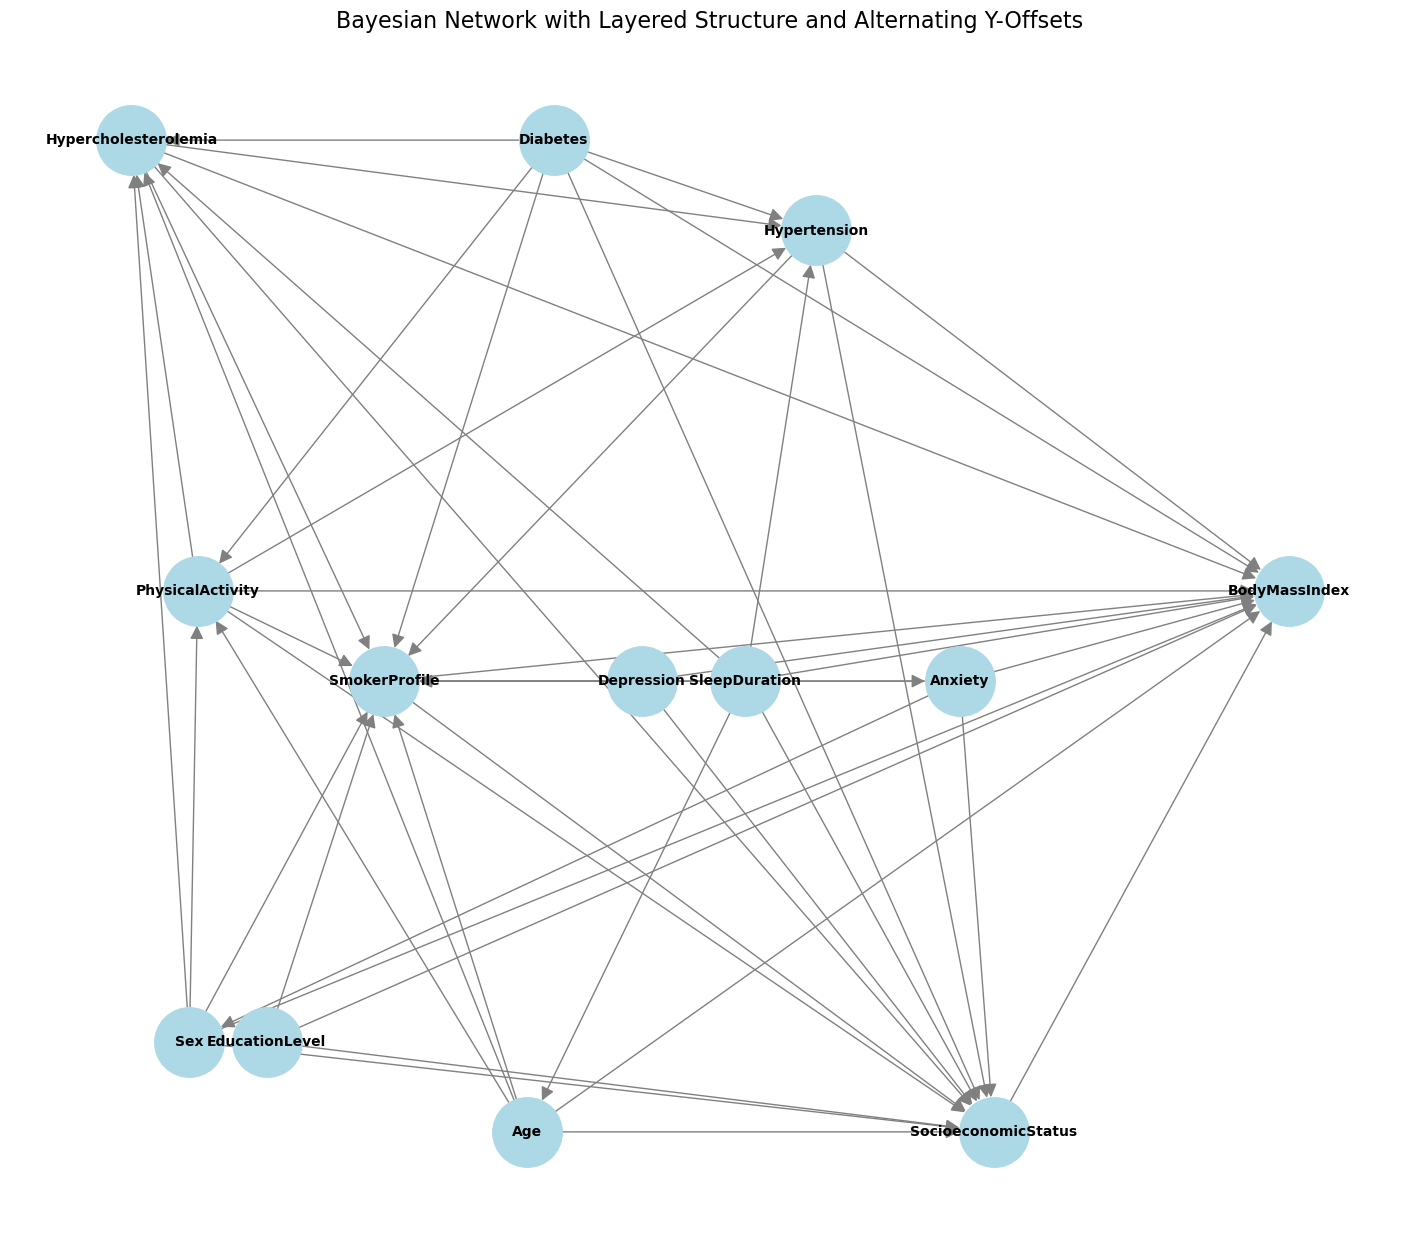

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Define edges for the Bayesian network based on your input
edges = [
    ('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'PhysicalActivity'),
    ('Age', 'SocioeconomicStatus'), ('Age', 'Hypercholesterolemia'), 
    ('Anxiety', 'BodyMassIndex'), ('Anxiety', 'Sex'), ('Anxiety', 'SmokerProfile'),
    ('Anxiety', 'SocioeconomicStatus'), ('Depression', 'BodyMassIndex'), 
    ('Depression', 'SmokerProfile'), ('Depression', 'SocioeconomicStatus'),
    ('Diabetes', 'BodyMassIndex'), ('Diabetes', 'PhysicalActivity'), 
    ('Diabetes', 'SmokerProfile'), ('Diabetes', 'SocioeconomicStatus'), 
    ('Diabetes', 'Hypercholesterolemia'), ('Diabetes', 'Hypertension'), 
    ('EducationLevel', 'BodyMassIndex'), ('EducationLevel', 'SmokerProfile'), 
    ('EducationLevel', 'SocioeconomicStatus'), ('Hypercholesterolemia', 'BodyMassIndex'), 
    ('Hypercholesterolemia', 'SmokerProfile'), ('Hypercholesterolemia', 'SocioeconomicStatus'), 
    ('Hypercholesterolemia', 'Hypertension'), ('Hypertension', 'BodyMassIndex'), 
    ('Hypertension', 'SmokerProfile'), ('Hypertension', 'SocioeconomicStatus'), 
    ('PhysicalActivity', 'BodyMassIndex'), ('PhysicalActivity', 'SmokerProfile'), 
    ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'SocioeconomicStatus'), 
    ('PhysicalActivity', 'Hypercholesterolemia'), ('Sex', 'BodyMassIndex'), 
    ('Sex', 'PhysicalActivity'), ('Sex', 'SmokerProfile'), ('Sex', 'SocioeconomicStatus'), 
    ('Sex', 'Hypercholesterolemia'), ('SleepDuration', 'BodyMassIndex'), 
    ('SleepDuration', 'SmokerProfile'), ('SleepDuration', 'SocioeconomicStatus'), 
    ('SleepDuration', 'Hypercholesterolemia'), ('SleepDuration', 'Age'), 
    ('SleepDuration', 'Hypertension'), ('SleepDuration', 'Anxiety'), 
    ('SmokerProfile', 'BodyMassIndex'), ('SmokerProfile', 'SocioeconomicStatus'), 
    ('SocioeconomicStatus', 'BodyMassIndex')
]

# Create the directed graph
G = nx.DiGraph(edges)

# Define the three categories and their layers
non_modifiable = ['Sex', 'Age', 'EducationLevel', 'SocioeconomicStatus']
modifiable = ['BodyMassIndex', 'PhysicalActivity', 'SleepDuration', 'SmokerProfile', 'Anxiety', 'Depression']
medical_conditions = ['Hypertension', 'Hypercholesterolemia', 'Diabetes']

# Initial layout using spring layout for a general structure
pos = nx.spring_layout(G, seed=42)  # Setting a seed for reproducibility

#Define a small offset for alternating positions within each layer
offset = 0.1  # Adjust as needed

#Apply alternating Y-coordinates within each layer using modulo
for i, node in enumerate(pos):
    if node in non_modifiable:
        # For even 'i', no offset; for odd 'i', apply offset
        pos[node][1] = 0 + (offset if i % 2 != 0 else -offset)  # Bottom layer with alternating Y
    elif node in modifiable:
        pos[node][1] = 1 + (offset if i % 2 != 0 else -offset)  # Middle layer with alternating Y
    elif node in medical_conditions:
        pos[node][1] = 2 + (offset if i % 2 != 0 else -offset)  # Top layer with alternating Y

#Then, draw the network as before
plt.figure(figsize=(14, 12))
nx.draw(G, pos=pos, with_labels=True, node_size=2500, font_size=10,
        font_color="black", font_weight="bold", node_color="lightblue",
        edge_color="gray", arrows=True, arrowstyle='-|>', arrowsize=20)
plt.title("Bayesian Network with Layered Structure and Alternating Y-Offsets", fontsize=16)
plt.axis('off')
plt.show()

In [9]:
from sklearn.metrics import f1_score
import numpy as np
import networkx as nx

def get_f1_score(estimated_model, true_model):
  # estimated_model and model must be DAGs
  nodes = estimated_model.nodes()
  est_adj = nx.to_numpy_array(
    estimated_model.to_undirected(), nodelist=nodes, weight=None
  )
  true_adj = nx.to_numpy_array(
    true_model.to_undirected(), nodelist=nodes, weight=None
  )

  f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))
  print("F1-score for the model skeleton: ", f1)

In [ ]:
true_model = BayesianNetwork([('L','C'), ('Q','C'), ('C','N'), ('L','N')])

get_f1_score(best_model, true_model)

In [11]:
from pgmpy.estimators import HillClimbSearch, K2Score 

# Load the data
data = pd.read_csv('cardiovascular_train.csv')

# Initialize the Hill Climbing search with K2 Score
hc = HillClimbSearch(data)
k2_scoring = K2Score(data)

# Estimate the best model based on the K2 score
best_model = hc.estimate(scoring_method=k2_scoring)

# Print the edges of the learned structure
print(best_model.edges())
k2_scoring.score(best_model)

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'PhysicalActivity'), ('Age', 'SocioeconomicStatus'), ('Age', 'Hypercholesterolemia'), ('Anxiety', 'BodyMassIndex'), ('Anxiety', 'Sex'), ('Anxiety', 'SmokerProfile'), ('Anxiety', 'SocioeconomicStatus'), ('Depression', 'BodyMassIndex'), ('Depression', 'SmokerProfile'), ('Depression', 'SocioeconomicStatus'), ('Diabetes', 'BodyMassIndex'), ('Diabetes', 'PhysicalActivity'), ('Diabetes', 'SmokerProfile'), ('Diabetes', 'SocioeconomicStatus'), ('Diabetes', 'Hypercholesterolemia'), ('Diabetes', 'Hypertension'), ('EducationLevel', 'BodyMassIndex'), ('EducationLevel', 'SmokerProfile'), ('EducationLevel', 'SocioeconomicStatus'), ('Hypercholesterolemia', 'BodyMassIndex'), ('Hypercholesterolemia', 'SmokerProfile'), ('Hypercholesterolemia', 'SocioeconomicStatus'), ('Hypercholesterolemia', 'Hypertension'), ('Hypertension', 'BodyMassIndex'), ('Hypertension', 'SmokerProfile'), ('Hypertension', 'SocioeconomicStatus'), ('PhysicalActivity', 'Body

95330.8431317256

In [ ]:
from pgmpy.estimators import ExhaustiveSearch
from pgmpy.estimators import K2Score 

df = pd.read_csv('cardiovascular_train.csv')

k2 = K2Score(df)
es = ExhaustiveSearch(data=df, scoring_method=k2)
best_model = es.estimate()
print('Edges:', best_model.edges())
print('Bayesian score:', k2.score(best_model))

In [ ]:
from pgmpy.estimators import HillClimbSearch, K2Score 

# Load the data
data = pd.read_csv('cardiovascular_train.csv')

# Initialize the Hill Climbing search with K2 Score
hc = HillClimbSearch(data)
k2_scoring = K2Score(data)

# Estimate the best model based on the K2 score
best_model = hc.estimate(scoring_method=k2_scoring)

# Print the edges of the learned structure
print("Learned structure using Hill Climbing + K2 Score:")
print(best_model.edges()) 